# Tarea semanal 14

## Parámetros S

1) Calcular los parámetros S de las siguiente red:

![img](img/ts14.png)

**a)** ¿Qué tipo de comportamiento tiene la red analizada? **Justifique utilizando alguno de los parámetros S.**

Para saber los parámetros S de esta red, cargo el circuito y supongo una transferencia de energía máxima. Luego:


$$T_{x} = T_{a} . T_{b} 
$$

Busco $T_a$ y $T_b$, por lo tanto, encuentro los parámetros Z de los dos cuadripolos y convierto:

### $T_A$

$$Z_{A}= \begin{pmatrix}  
s+ \frac{1}{2s} & \frac{1}{2s} 
\\ \frac{1}{2s} & \frac{1}{2s}   
\end{pmatrix} $$

$$\Delta Z_{A}= \frac{1}{2}+ \frac{1}{4s^{2}}- \frac{1}{4s^{2}} = \frac{1}{2}$$

$$
T_{A}= \begin{pmatrix}  
\frac{Z_{11_A}}{Z_{21_A}} & \frac{\Delta Z_A}{Z_{21_A}} 
\\ \frac{1}{Z_{21_A}} & \frac{Z_{22_A}}{Z_{21_A}}    
\end{pmatrix}  
=\begin{pmatrix}  
2s^{2}+1 & s 
\\ 2s & 1    
\end{pmatrix}$$

### $T_B$

$$Z_{B}= \begin{pmatrix}  
s+ 1 & 1 
\\ 1& 1   
\end{pmatrix} $$

$$\Delta Z_{B}= s$$

$$
T_{B}= \begin{pmatrix}  
\frac{Z_{11_B}}{Z_{21_B}} & \frac{\Delta Z_B}{Z_{21_B}} 
\\ \frac{1}{Z_{21_B}} & \frac{Z_{22_B}}{Z_{21_B}}    
\end{pmatrix} 
=\begin{pmatrix}  
s+1 & s
\\ 1 & 1   
\end{pmatrix} 
$$

Ahora multiplico las dos matrices:

$$T_{X}= \begin{pmatrix}  
2s^{2}+1 & s 
\\ 2s & 1    
\end{pmatrix}
\begin{pmatrix}  
s+1 & s
\\ 1 & 1   
\end{pmatrix} =
\begin{pmatrix}  
(s+1).(2s^{2}+1)+s& X
\\ 2(s^{2}+s)+1 & X   
\end{pmatrix} $$

Convirtiendo a matriz Z:

$$Z_{x} = 
\begin{pmatrix}  
\frac{A}{C} &  \frac{\Delta T}{C} \\ \frac{1}{C} & \frac{D}{C}    
\end{pmatrix}$$

Por lo tanto:
$$Z_{11} = \frac{2s^{3}+2s^{2}+2s+1}{2s^{2}+2s+1}$$

Luego podemos saber que:

### S_11

$$S_{11}= \frac{Z_{11}-R_{0}}{Z_{11}+R_{0}}$$
$$S_{11}= \frac{\frac{2s^{3}+2s^{2}+2s+1}{2s^{2}+2s+1}-1}{\frac{2s^{3}+2s^{2}+2s+1}{2s^{2}+2s+1}+1}$$
$$S_{11} = \frac{s^{3}}{s^{3} + 2 s^{2} + 2 s + 1}$$

### S_21

$$S_{21}= \frac{V_2}{V_{g1}/2}$$
$$S_{21}= \frac{2}{A} \frac{R_0}{Z_{11}+R_0}$$
$$S_{21}= \frac{2R_0}{Z_{11}+R_0}$$



In [2]:
from sympy import *
from sympy import symbols, cancel, pprint, latex
from sympy import MatrixSymbol, Matrix

from sympy.solvers.solveset import linsolve
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot

s = Symbol('s')
r0 = 1

T_lr0 =  Matrix([[s+1,s], [1,1]])
T_lc =  Matrix([[2*s**2+1,s], [2*s,1]])
T_r0 = Matrix([[1,-1], [-1,1]])

T_x = T_lc*T_lr0
T_x = simplify(T_x)

z1 = T_x[0,0]/T_x[1,0]

s_11 = (z1-r0)/(z1+r0)
s_11 = simplify(s_11)

#T_x = T_r0*T_lc*T_lr0
T_x = simplify(T_x)

s_21 = (2/(T_x[0,0])) *z1/(z1+r0)
s_21 = cancel(s_21)

print("S_11")
display(s_11)

print("s_21")
display(s_21)

S_11


s**3/(s**3 + 2*s**2 + 2*s + 1)

s_21


1/(s**3 + 2*s**2 + 2*s + 1)

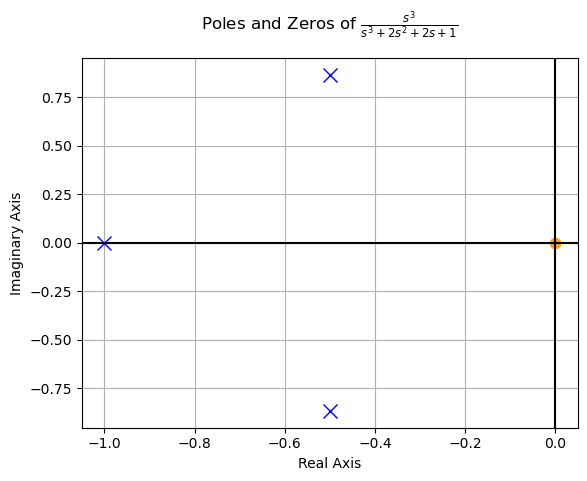

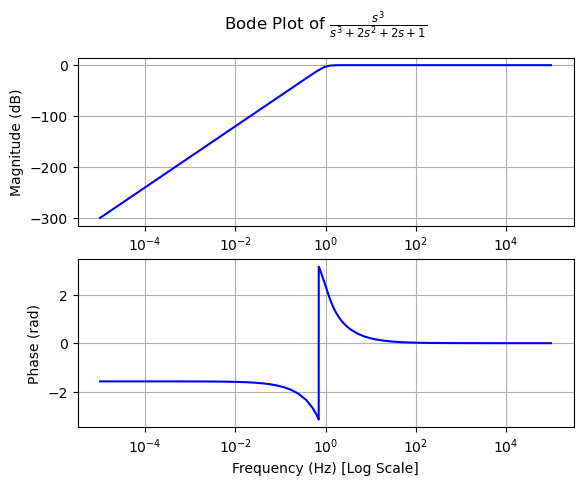

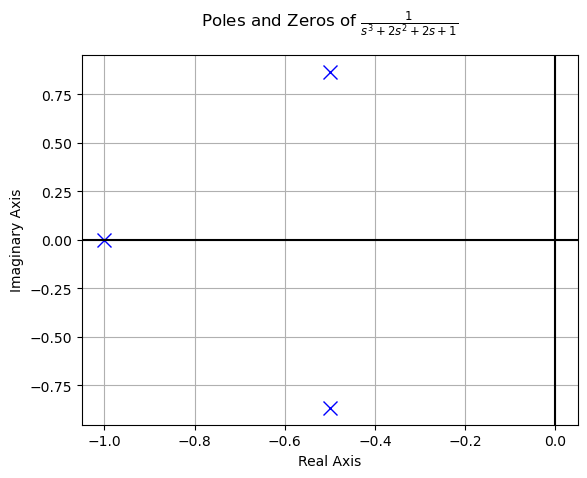

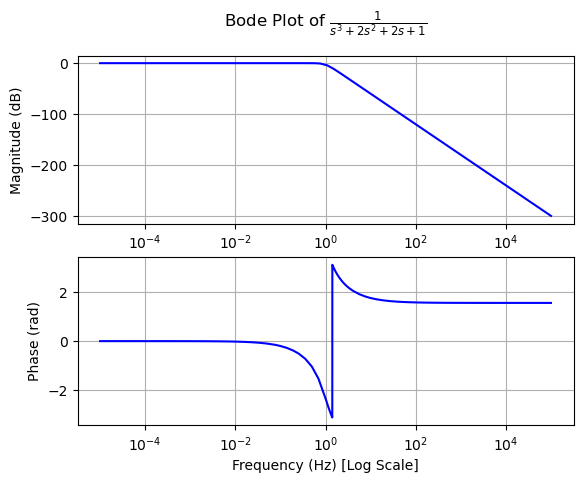

In [4]:
Transf_S11 = TransferFunction.from_rational_expression(s_11,var =s)
Transf_S21 = TransferFunction.from_rational_expression(s_21,var =s)

print()
print()
pole_zero_plot(Transf_S11)
bode_plot(Transf_S11)

print()
print()
pole_zero_plot(Transf_S21)
bode_plot(Transf_S21) 


**b)** A partir del parámetro $S_{11}$ y $S_{21}$, explique el comportamiento de la red para:
-   $\omega=0$   (centro de la banda de paso)
-   $\omega=1$  (frecuencia de corte)
-   $\omega→∞$  (centro de la banda de detención)

Para $\omega = 0$ :

$S_{11}$ es cero, por la onda reflejada en la entrada es 0 cuando la onda incidente en la salida es cero. Estamos en la condición de ausencia de reflexión
$S_{21}$ es 1, por lo que la onda transmitida a la salida es la misma que la que la incidente en la entrada.

Para $\omega = 1$ :

$S_{11}$ es 1/2, por la onda reflejada en la entrada es la mitad que la onda incidente en la entrada. 
$S_{21}$ es 1/2, por lo que la onda transmitida a la salida es la mitad que la que la incidente en la entrada.

Para $\omega \rightarrow \infty$ :

$S_{11}$ es 1, por la onda reflejada en la entrada es igual a la onda incidente. 
$S_{21}$ es 0, por lo que la onda transmitida de la entrada a la salida es nula.

# Simulación LTSpice

Para la simulación se trabajó con el siguiente circuito:

![img](img/S_21_circuito.png)

Midiendo la tensión de salida nos advierte que es del tipo Butterworth debido a que tenemos 3dB de caída en la frecuencia de corte con respecto a la frecuencia de banda. Además tenemos 60dB/decada de pendiente, por lo tanto es un Butterworth de orden 3. 

Coincidente con lo visto teóricamente.

![img](img/S_21_AC_sim.png)
